## 뉴스 기사 분류 - 다중 분류 연습문제
- 로이터 뉴스 기사 분류
- 46개의 주제로 이루어진 뉴스 기사 분류
- keras.datasets의 reuters 데이터 
- (1) 데이터 준비 
- (2) 모델링 
    - 3개의 Dense층 (유닛수 : 64, 64, 46)
- (3) 시각화 
- (4) 재학습 / 시각화
- (5) 예측 

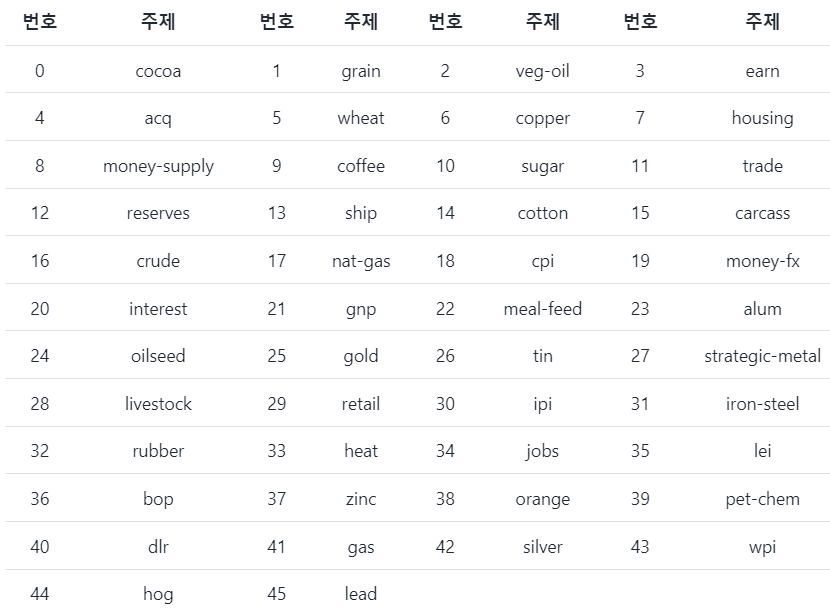

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
# 데이터 준비

In [3]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels)  = reuters.load_data(num_words=10000)

In [4]:
train_data.shape
train_labels.shape
test_data.shape
test_labels.shape

(8982,)

(8982,)

(2246,)

(2246,)

In [5]:
# 레이블값
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [6]:
# train_data 내 각 리스트의 크기 확인
len(train_data[0])
len(train_data[1])
len(train_data[2])
# 다름 

87

56

139

In [7]:
train_labels
len(train_labels)

array([ 3,  4,  3, ..., 25,  3, 25])

8982

In [8]:
# 데이터 전처리

In [9]:
# 패딩 작업
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# 훈련 데이터를 벡터로 변환
X_train = vectorize_sequence(train_data).astype('float32')
X_test = vectorize_sequence(test_data).astype('float32') # 테스트 데이터

# 레이블은 float으로 변환할 필요없이 그냥 바로 쓴다.

In [10]:
X_train
X_test
 
 # 레이블
test_labels
train_labels

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], dtype=float32)

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]], dtype=float32)

array([ 3, 10,  1, ...,  3,  3, 24])

array([ 3,  4,  3, ..., 25,  3, 25])

In [12]:
X_val = X_train[:2000] # 1000개 검증용
partial_X_train = X_train[2000:] # 나머지 학습용

y_val = train_labels[:2000] # 1000개
partial_y_train = train_labels[2000:] # 나머지

In [13]:
X_val.shape
partial_X_train.shape
y_val.shape
partial_y_train.shape

(2000, 10000)

(6982, 10000)

(2000,)

(6982,)

In [ ]:
# 모델링

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

# (1) 모델 설정

# 3개의 밀집층(Dense)으로 구성 (2개의 은닉층과 출력층 46개)
# 첫번째 은닉층 : 유닛수(출력수) : 64개 / 입력 : 10000
# 두번째 은닉층 : 유닛수(출력수) : 64개 

model = Sequential()
model.add(Dense(64, input_shape=(10000,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(46 , activation='softmax'))  # 46개 분류니까

# (2) 컴파일
# loss : sparse_categorical_crossentropy
# to_categorical쓰는 경우 sparse대신 그냥 쓰기
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# (3) 학습
epochs = 20
batch_size = 512

history = model.fit(x = partial_X_train, y = partial_y_train,
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val))

# (4) 모델 평가 (결과 출력)
loss, accuracy =  model.evaluate(X_test, test_labels)
print(f'정확도 : {accuracy:.4f}, 손실 : {loss:.4f}')

# 정확도 : 0.7707, 손실 : 1.2643

Epoch 1/20
14/14 [==============================] - 1s 45ms/step - loss: 2.6307 - accuracy: 0.5169 - val_loss: 1.8042 - val_accuracy: 0.6405
Epoch 2/20
14/14 [==============================] - 0s 25ms/step - loss: 1.4459 - accuracy: 0.7017 - val_loss: 1.3926 - val_accuracy: 0.6970
Epoch 3/20
14/14 [==============================] - 0s 27ms/step - loss: 1.0629 - accuracy: 0.7766 - val_loss: 1.2246 - val_accuracy: 0.7325
Epoch 4/20
14/14 [==============================] - 0s 25ms/step - loss: 0.8401 - accuracy: 0.8214 - val_loss: 1.1226 - val_accuracy: 0.7635
Epoch 5/20
14/14 [==============================] - 0s 26ms/step - loss: 0.6751 - accuracy: 0.8612 - val_loss: 1.0701 - val_accuracy: 0.7655
Epoch 6/20
14/14 [==============================] - 0s 26ms/step - loss: 0.5378 - accuracy: 0.8920 - val_loss: 1.0253 - val_accuracy: 0.7840
Epoch 7/20
14/14 [==============================] - 0s 26ms/step - loss: 0.4366 - accuracy: 0.9109 - val_loss: 1.0232 - val_accuracy: 0.7785
Epoch 8/20
14

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640064    
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647214 (2.47 MB)
Trainable params: 647214 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

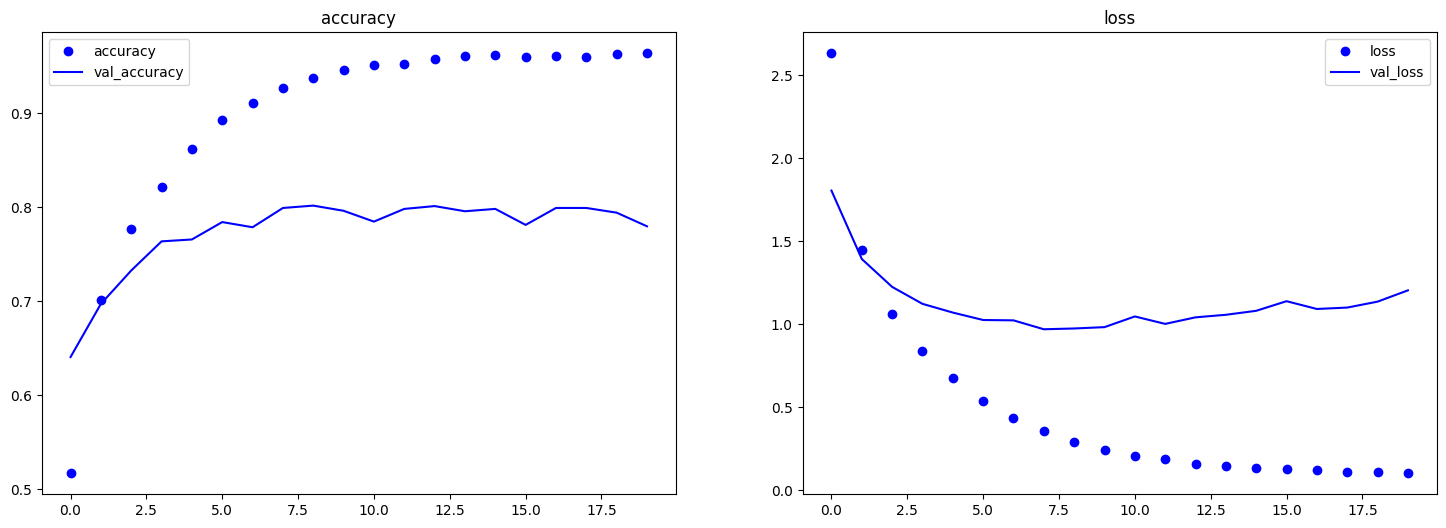

In [18]:
# (3) 시각화
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'bo',label='accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='val_accuracy')
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'bo', label='loss')
plt.plot(history.history['val_loss'], 'b', label='val_loss')
plt.title('loss')
plt.legend()

plt.show()


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

# (1) 모델 설정

model = Sequential()
model.add(Dense(64, input_shape=(10000,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(46 , activation='softmax'))  # 46개 분류니까

# (2) 컴파일
# loss : sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# (3) 학습
epochs = 10
batch_size = 512

history = model.fit(x = partial_X_train, y = partial_y_train,
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_val, y_val))

# (4) 모델 평가 (결과 출력)
loss, accuracy =  model.evaluate(X_test, test_labels)
print(f'정확도 : {accuracy:.4f}, 손실 : {loss:.4f}')

# 정확도 : 0.7707, 손실 : 1.2643
# epochs 10 : 정확도 : 0.7832, 손실 : 1.0316

Epoch 1/10
14/14 [==============================] - 1s 54ms/step - loss: 2.7569 - accuracy: 0.5095 - val_loss: 1.8782 - val_accuracy: 0.6185
Epoch 2/10
14/14 [==============================] - 0s 23ms/step - loss: 1.5184 - accuracy: 0.6786 - val_loss: 1.4468 - val_accuracy: 0.6870
Epoch 3/10
14/14 [==============================] - 0s 33ms/step - loss: 1.1252 - accuracy: 0.7541 - val_loss: 1.2628 - val_accuracy: 0.7265
Epoch 4/10
14/14 [==============================] - 0s 24ms/step - loss: 0.8939 - accuracy: 0.8085 - val_loss: 1.1586 - val_accuracy: 0.7495
Epoch 5/10
14/14 [==============================] - 0s 27ms/step - loss: 0.7180 - accuracy: 0.8482 - val_loss: 1.0910 - val_accuracy: 0.7625
Epoch 6/10
14/14 [==============================] - 0s 27ms/step - loss: 0.5758 - accuracy: 0.8801 - val_loss: 1.0752 - val_accuracy: 0.7690
Epoch 7/10
14/14 [==============================] - 0s 26ms/step - loss: 0.4680 - accuracy: 0.9005 - val_loss: 1.0436 - val_accuracy: 0.7725
Epoch 8/10
14

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

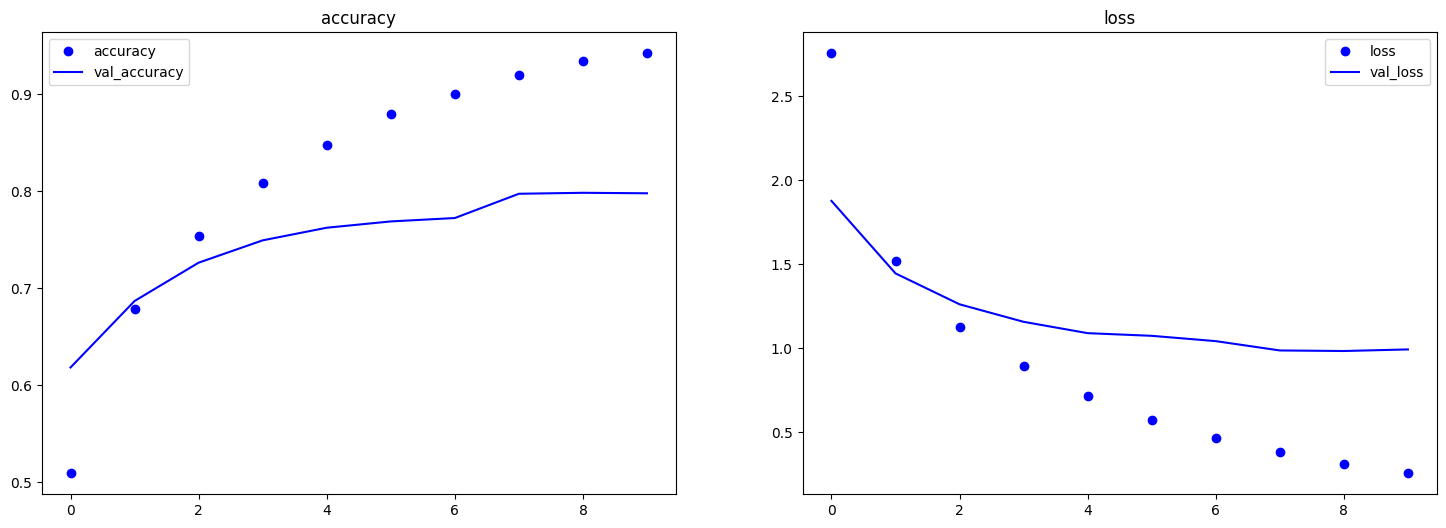

In [21]:
# (4) 재학습 / 시각화
plt.figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'bo',label='accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='val_accuracy')
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'bo', label='loss')
plt.plot(history.history['val_loss'], 'b', label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

In [ ]:
# (5) 예측

In [22]:
# 모델 저장
model.save('../../data/news_model.keras') 

In [23]:
# 모델 불러오기
from tensorflow.keras.models import load_model

loaded_model = load_model('../../data/news_model.keras')

In [25]:
# 예측
y_pre_prob = loaded_model.predict(X_test, verbose=0)
y_pred = y_pre_prob.argmax(axis=1)
y_pred[:10]
test_labels[:10]
# 하나빼고 다 예측 성공

array([ 3, 10,  1,  4, 13,  3,  3,  3,  3,  3])

array([ 3, 10,  1,  4,  4,  3,  3,  3,  3,  3])